In [1]:
import pandas as pd
import numpy as np

In [120]:
event_data = pd.read_csv('event_data.csv', dtype={'device_id': str})

In [121]:
event_data.tail()

,event_id,device_id,timestamp,longitude,latitude,city,state
534410,1930098,8076952602619385461,2016-05-07 10:00:49,76.826195,30.772198,Chandigarh,Chandigarh
534411,1919095,-4969474265401848066,2016-05-05 00:29:56,76.846153,30.830111,Chandigarh,Chandigarh
534412,2608925,3743400887497188525,2016-05-06 08:30:00,76.861488,30.826464,Chandigarh,Chandigarh
534413,3001451,-4436186230350990184,2016-05-01 15:12:29,76.813683,30.785307,Chandigarh,Chandigarh
534414,3229508,-4923978208941087520,2016-05-01 10:08:12,76.847328,30.845663,Chandigarh,Chandigarh


In [122]:
event_data.shape

(534415, 7)

In [123]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534415 entries, 0 to 534414
Data columns (total 7 columns):
event_id     534415 non-null int64
device_id    534352 non-null object
timestamp    534415 non-null object
longitude    534352 non-null float64
latitude     534352 non-null float64
city         534415 non-null object
state        534415 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 28.5+ MB


In [124]:
event_data.describe(include='all')

,event_id,device_id,timestamp,longitude,latitude,city,state
count,5.344150e+05,534352,534415,534352.000000,534352.000000,534415,534415
unique,NaN,9563,345583,NaN,NaN,202,6
top,NaN,5536513450525271144,2016-05-03 19:17:57,NaN,NaN,Chennai,TamilNadu
freq,NaN,33405,9,NaN,NaN,366828,436282
mean,1.629986e+06,NaN,NaN,80.041638,15.523034,NaN,NaN
std,9.387003e+05,NaN,NaN,1.438010,5.733225,NaN,NaN
min,2.000000e+00,NaN,NaN,12.567400,8.190110,NaN,NaN
25%,8.168485e+05,NaN,NaN,80.282196,13.118649,NaN,NaN
50%,1.633103e+06,NaN,NaN,80.313164,13.145584,NaN,NaN
75%,2.442676e+06,NaN,NaN,80.351685,13.179580,NaN,NaN


#### Device Id, latitude and longitude columns are empty for few records.

In [125]:
gender_age_train = pd.read_csv('gender_age_train.csv', dtype={'device_id': str})

In [126]:
gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [127]:
gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null object
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [128]:
gender_age_train.describe(include='all')

,device_id,gender,age,group
count,74645,74645,74645.000000,74645
unique,74645,2,NaN,12
top,802852493392259819,M,NaN,M23-26
freq,1,47904,NaN,9605
mean,NaN,NaN,31.410342,NaN
std,NaN,NaN,9.868735,NaN
min,NaN,NaN,1.000000,NaN
25%,NaN,NaN,25.000000,NaN
50%,NaN,NaN,29.000000,NaN
75%,NaN,NaN,36.000000,NaN


In [129]:
gender_age_train.shape

(74645, 4)

In [130]:
phone_brand_device_model = pd.read_csv('phone_brand_device_model.csv', dtype={'device_id': str})

In [131]:
phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [132]:
phone_brand_device_model.shape

(87726, 3)

In [133]:
phone_brand_device_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null object
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: object(3)
memory usage: 2.0+ MB


In [134]:
phone_brand_device_model.describe(include='all')

,device_id,phone_brand,device_model
count,87726,87726,87726
unique,87726,116,1467
top,-5940437598218410209,小米,红米note
freq,1,21645,3500


#### PHONE_BRAN_DEVICE_MODEL and GENDER_AGE_TRAIN data set contains information for all devices, with no empty column.
#### Need to filter these datasets to only have deivce information related to EVENT_DATA

## Process data to filter irrelevant values

#### Get list of unique device ids from EVENT_DATA  to filter relevant phone and gender information.

In [135]:
device_ids = event_data['device_id'].unique()

In [136]:
device_ids.shape

(9564,)

In [137]:
device_id_data= pd.DataFrame({'device_id': device_ids})

####  Filter applicable records from gender age data set by device ids

In [138]:
gender_age_train=device_id_data.merge(gender_age_train,on='device_id', how='left')

In [139]:
gender_age_train.dropna(axis=0,how='all',inplace=True)

In [140]:
gender_age_train.shape

(9563, 4)

In [141]:
gender_age_train.head()

,device_id,gender,age,group
0,-2638302274530537957,F,29.0,F29-32
1,2687021466923970058,F,25.0,F24-26
2,-5080051514408049802,F,27.0,F27-28
3,-4909264578655508813,M,19.0,M22-
4,-965141125520486405,F,38.0,F33-42


####  Filter applicable records from phone brand data set by device ids

In [142]:
phone_brand_device_model=device_id_data.merge(phone_brand_device_model,on='device_id', how='left')

In [143]:
phone_brand_device_model.shape

(9564, 3)

### Data cleanup

#### Analyze and populate empty device id records

In [144]:
empty_device_data=event_data.loc[pd.isnull(event_data['device_id']),['longitude','latitude','city','state']].drop_duplicates()
empty_device_data

,longitude,latitude,city,state
170221,80.309273,13.149176,Chennai,TamilNadu
175889,80.335434,13.189053,Chennai,TamilNadu
200756,80.343613,13.153332,Chennai,TamilNadu


#### There are 3 distinct longitude, latitude, city and state for which device id is null. Lets review data for these combinations are try to populate device id.

In [145]:
def createMask(longitude, latitude, city, state):
    return (event_data['city']==city) & (round(event_data['longitude'],6)==longitude) & (round(event_data['latitude'],6)==latitude)

In [146]:
def findEmptyDeviceDataBy(longitude, latitude, city, state):
    return event_data.loc[(event_data['city']==city) & (round(event_data['longitude'],6)==longitude) & (round(event_data['latitude'],6)==latitude) & (event_data['device_id'].notnull()),['device_id']]['device_id'].unique()

In [147]:
for index, row in empty_device_data.iterrows():
    print(findEmptyDeviceDataBy(round(row['longitude'],6),round(row['latitude'],6),row['city'],row['state']))
    

['7662139143719919126']
['7983871429718484702']
['5731369272434022440']


#### For each empty device id, only single device id record was found my matching given longitude, latitude, city and state combination. Let replace empty device ids using above device ids.

In [148]:
def findNonEmptyDeviceDataBy(longitude, latitude, city, state):
    return event_data.loc[(event_data['city']==city) & (round(event_data['longitude'],6)==longitude) & (round(event_data['latitude'],6)==latitude) & (event_data['device_id'].isnull())]

In [149]:
for index, row in empty_device_data.iterrows():
    print(event_data.loc[(createMask(round(row['longitude'],6),round(row['latitude'],6),row['city'],row['state'])) & (event_data['device_id'].isnull())].shape)
    event_data.loc[(createMask(round(row['longitude'],6),round(row['latitude'],6),row['city'],row['state'])) & (event_data['device_id'].isnull()),['device_id']]=findEmptyDeviceDataBy(round(row['longitude'],6),round(row['latitude'],6),row['city'],row['state'])

(21, 7)
(21, 7)
(21, 7)


#### Verify if device id are null

In [150]:
event_data.loc[pd.isnull(event_data['device_id']),['longitude','latitude','city','state']].drop_duplicates().head()

,longitude,latitude,city,state


#### Analyze and populate empty longitude records

In [151]:
empty_geo_data=event_data.loc[(pd.isnull(event_data['longitude'])),['device_id','city','state']].drop_duplicates()
empty_geo_data

,device_id,city,state
170217,7662139143719919126,Chennai,TamilNadu
175885,7983871429718484702,Chennai,TamilNadu
200752,5731369272434022440,Chennai,TamilNadu


In [152]:
def findNonEmptyGeoDataBy(device_id, city, state):
    return event_data.loc[(event_data['city']==city) & (event_data['state']==state) & (event_data['device_id']==device_id) & (event_data['longitude'].notnull()),['longitude','latitude']].drop_duplicates()

In [153]:
def emptyGeoRecordMask(device_id, city, state):
    return (event_data['city']==city) & (event_data['state']==state) & (event_data['device_id']==device_id) & (event_data['longitude'].isnull())

In [154]:
for index, row in empty_geo_data.iterrows():
    print(findNonEmptyGeoDataBy(row['device_id'],row['city'],row['state']))
    

        longitude   latitude
170164  80.309273  13.149176
        longitude   latitude
175832  80.335434  13.189053
        longitude   latitude
200699  80.343613  13.153332


#### For each empty longitude/latitude, only single longitude/latitude record was found my matching given device is, city and state combination. Let replace empty device ids using above longitude/latitude.

In [155]:
for index, row in empty_geo_data.iterrows():
    print(event_data.loc[emptyGeoRecordMask(row['device_id'],row['city'],row['state'])].shape)
    event_data.loc[emptyGeoRecordMask(row['device_id'],row['city'],row['state']),['longitude']]=findNonEmptyGeoDataBy(row['device_id'],row['city'],row['state'])['longitude'].values[0]
    event_data.loc[emptyGeoRecordMask(row['device_id'],row['city'],row['state']),['latitude']]=findNonEmptyGeoDataBy(row['device_id'],row['city'],row['state'])['latitude'].values[0]
    
    
    

(21, 7)
(21, 7)
(21, 7)


In [156]:
event_data.loc[pd.isnull(event_data['longitude']),['device_id','city','state']]

,device_id,city,state


In [157]:
empty_latitude_data=event_data.loc[(pd.isnull(event_data['latitude']))]
empty_latitude_data.shape

(63, 7)

In [158]:
empty_latitude_data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
170217,54893,7662139143719919126,2016-05-01 19:17:34,80.309273,NaN,Chennai,TamilNadu
170432,236974,7662139143719919126,2016-05-07 21:20:51,80.309273,NaN,Chennai,TamilNadu
170698,477607,7662139143719919126,2016-05-02 01:17:37,80.309273,NaN,Chennai,TamilNadu
170949,736288,7662139143719919126,2016-05-06 12:53:00,80.309273,NaN,Chennai,TamilNadu
171123,884744,7662139143719919126,2016-05-07 19:08:10,80.309273,NaN,Chennai,TamilNadu


In [159]:
empty_latitude_data=event_data.loc[(pd.isnull(event_data['latitude'])),['longitude','device_id','city','state']].drop_duplicates()
empty_latitude_data

,longitude,device_id,city,state
170217,80.309273,7662139143719919126,Chennai,TamilNadu
175885,80.335434,7983871429718484702,Chennai,TamilNadu
200752,80.343613,5731369272434022440,Chennai,TamilNadu


In [160]:
def findNonEmptyLatitudeDataBy(device_id,longitude, city, state):
    return event_data.loc[(round(event_data['longitude'],6)==round(longitude,6)) & (event_data['city']==city) & (event_data['state']==state) & (event_data['device_id']==device_id) & (event_data['latitude'].notnull()),['longitude','latitude']].drop_duplicates()

In [161]:
def createEmptyLatitudeDataMask(device_id,longitude, city, state):
    return ((round(event_data['longitude'],6)==round(longitude,6)) & (event_data['city']==city) & (event_data['state']==state) & (event_data['device_id']==device_id) & (event_data['latitude'].isnull()))

In [162]:
for index, row in empty_latitude_data.iterrows():
    print(findNonEmptyLatitudeDataBy(row['device_id'],round(row['longitude'],6),row['city'],row['state']))

        longitude   latitude
170164  80.309273  13.149176
        longitude   latitude
175832  80.335434  13.189053
        longitude   latitude
200699  80.343613  13.153332


#### For each empty latitude, only single latitude record was found my matching given device id, longitude, city and state combination. Let replace empty device ids using above latitude.

In [163]:
for index, row in empty_latitude_data.iterrows():
    print(event_data.loc[createEmptyLatitudeDataMask(row['device_id'],row['longitude'],row['city'],row['state'])].shape)
    event_data.loc[createEmptyLatitudeDataMask(row['device_id'],row['longitude'],row['city'],row['state']),['latitude']]= findNonEmptyLatitudeDataBy(row['device_id'],row['longitude'],row['city'],row['state'])['latitude'].values[0]
    
    
    

(21, 7)
(21, 7)
(21, 7)


In [164]:
event_data.loc[pd.isnull(event_data['latitude']),['device_id','city','state']].head()

,device_id,city,state


#### Lets review and plot longitude and latitude data on map

In [165]:
geo_data=event_data[['longitude','latitude','city','state']].drop_duplicates()

In [166]:
geo_data.head()

,longitude,latitude,city,state
0,91.291695,23.860241,Agartala,Tripura
77,91.334343,23.931276,Agartala,Tripura
141,91.290550,23.919113,Agartala,Tripura
150,91.322464,23.869284,Agartala,Tripura
250,91.316566,23.878222,Agartala,Tripura


In [167]:
locations = event_data[['latitude','longitude']].drop_duplicates()
print(locations[locations['latitude'].isnull()].shape)
locationlist= locations.values.tolist()

(0, 2)


In [168]:
len(locationlist)

9566

In [169]:
import folium

map = folium.Map(location=locationlist[1], zoom_start=5)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)

#### Folium map is slow to load and crashes notebook. Let draw scatter plot to visualize longitude, latitude and state data.

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
geo_data.head()

,longitude,latitude,city,state
0,91.291695,23.860241,Agartala,Tripura
77,91.334343,23.931276,Agartala,Tripura
141,91.290550,23.919113,Agartala,Tripura
150,91.322464,23.869284,Agartala,Tripura
250,91.316566,23.878222,Agartala,Tripura


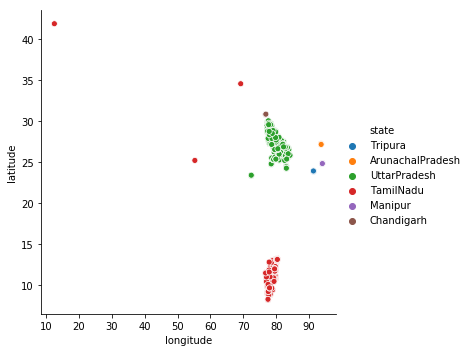

In [172]:
sns.relplot(data=geo_data, y='latitude', x='longitude', hue='state')
plt.show()

#### Evident from above plot ther are few outliers for TamilNadu and UttarPradesh

In [173]:
tn_out_data=event_data.loc[(event_data['state']=='TamilNadu') & (event_data['longitude']<75) & (event_data['latitude']>20),['longitude','latitude','city','state']].drop_duplicates()
tn_out_data

,longitude,latitude,city,state
228381,55.270802,25.204800,Chennai,TamilNadu
263525,12.567400,41.871899,Chennai,TamilNadu
350138,69.207497,34.555302,Chennai,TamilNadu


In [174]:
up_out_data=event_data.loc[(event_data['state']=='UttarPradesh') & (event_data['longitude']<73) & (event_data['latitude']<25),['longitude','latitude','city','state']].drop_duplicates()
up_out_data.head()

,longitude,latitude,city,state
5133,72.419670,23.397142,Kadi,UttarPradesh
18661,72.389008,23.368422,Kadi,UttarPradesh
26511,72.425514,23.330158,Kadi,UttarPradesh
31006,72.365273,23.375839,Kadi,UttarPradesh
37267,72.426834,23.346064,Kadi,UttarPradesh


In [175]:
geo_out_data=tn_out_data.append(up_out_data)
geo_out_data.head()

,longitude,latitude,city,state
228381,55.270802,25.204800,Chennai,TamilNadu
263525,12.567400,41.871899,Chennai,TamilNadu
350138,69.207497,34.555302,Chennai,TamilNadu
5133,72.419670,23.397142,Kadi,UttarPradesh
18661,72.389008,23.368422,Kadi,UttarPradesh


In [176]:
locations = geo_out_data[['latitude','longitude']].drop_duplicates()
print(locations[locations['latitude'].isnull()].shape)
locationlist= locations.values.tolist()

(0, 2)


In [177]:
len(locationlist)

28

In [178]:
import folium

map = folium.Map(location=locationlist[27], zoom_start=5)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)

In [61]:
map

#### Eveident from above plot, these geo locations are out of sync with city and state information. Lets drop these events.

In [179]:
event_data=event_data.drop(event_data[(event_data['state']=='TamilNadu') & (event_data['longitude']<75) & (event_data['latitude']>20)].index)

In [180]:
event_data=event_data.drop(event_data[(event_data['state']=='UttarPradesh') & (event_data['longitude']<73) & (event_data['latitude']<25)].index)

In [181]:
geo_data=event_data[['longitude','latitude','city','state']].drop_duplicates()

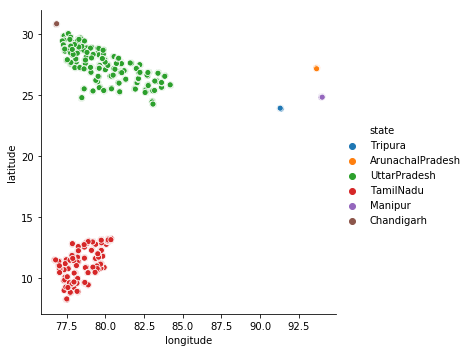

In [182]:
sns.relplot(data=geo_data, y='latitude', x='longitude', hue='state')
plt.show()

#### Data clean up is done. Lets confirm

In [66]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533459 entries, 0 to 534414
Data columns (total 7 columns):
event_id     533459 non-null int64
device_id    533459 non-null object
timestamp    533459 non-null object
longitude    533459 non-null float64
latitude     533459 non-null float64
city         533459 non-null object
state        533459 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 32.6+ MB


In [67]:
phone_brand_dict={}
device_model_dict={}

In [68]:
phone_brands=phone_brand_device_model['phone_brand'].unique()
len(phone_brands)
phone_brands


array(['三星', '酷比', '小米', '魅族', 'vivo', '华为', 'OPPO', '优米', '梦米', 'HTC',
       'LG', '奇酷', '天语', '乐视', '朵唯', '努比亚', '黑米', '酷派', '美图', '摩托罗拉',
       'TCL', '波导', '海信', '唯米', '华硕', '米歌', '酷比魔方', '锤子', 'SUGAR', '中国移动',
       '爱派尔', '联想 ', '果米', '欧博信', '邦华', '诺基亚', 'LOGO', '贝尔丰', '斐讯', '谷歌',
       '语信', '奥克斯', '纽曼', '富可视', '一加', '智镁', '艾优尼', '优购', '尼比鲁', '摩乐',
       'ZUK', '青橙', '夏新', '聆韵', '康佳', '长虹', '诺亚信', nan, '海尔', '台电',
       'Lovme', '小杨树', '德赛', '百立丰', '易派', '至尊宝', '惠普', '大可乐', '飞秒', '唯比',
       '米奇', '金星数码', '糯米', '大Q', '基伍', '欧奇', '广信', '百加', '神舟', '维图', '先锋',
       '青葱'], dtype=object)

In [69]:
phone_models=phone_brand_device_model['device_model'].unique()
len(phone_models)


900

In [ ]:
from translate import translator
import time
for brand in phone_brands:
    
    if  brand not in phone_brand_dict:
        print(brand)
        time.sleep(1)
        try:
            data=translator('zh-CN','en', brand)
            if ((len(data)>0) & (len(data[0])>0) & (len(data[0][0])>0)):
                print(data[0][0][0])
                phone_brand_dict[brand]=data[0][0][0]        

        except:
            print("An exception occurred")


In [70]:
phone_brand_dict

{}

In [71]:
# Google API is throwing error, fall back to known translations

if len(phone_brand_dict)==0:
    phone_brand_dict['华为']='Huawei'
    phone_brand_dict['小米']='Xiaomi'
    phone_brand_dict['三星']='Samsung'
    phone_brand_dict['魅族']='Meizu'
    phone_brand_dict['酷派']='Coolpad'
    phone_brand_dict['乐视']='LeEco'
    phone_brand_dict['联想 ']='Lenovo'


In [ ]:
for model in phone_models:
    
    if  model not in device_model_dict:
        print(model)
        try:
            data=translator('zh-CN','en', model)
            if ((len(data)>0) & (len(data[0])>0) & (len(data[0][0])>0)):
                print(data[0][0][0])
                device_model_dict[model]=data[0][0][0]        
        except:
            print("An exception occurred")
        


In [72]:
device_model_dict

{}

In [73]:
phone_brand_dict

{'华为': 'Huawei',
 '小米': 'Xiaomi',
 '三星': 'Samsung',
 '魅族': 'Meizu',
 '酷派': 'Coolpad',
 '乐视': 'LeEco',
 '联想 ': 'Lenovo'}

In [74]:
# repalce vlaues using dict

phone_brand_device_model['phone_brand']=phone_brand_device_model['phone_brand'].map(phone_brand_dict).fillna(phone_brand_device_model['phone_brand'])

In [75]:
phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,-2638302274530537957,Samsung,Galaxy Grand 2
1,2687021466923970058,酷比,M1
2,-5080051514408049802,Xiaomi,小米note
3,-4909264578655508813,Samsung,A788t
4,-965141125520486405,Meizu,魅蓝Note 2


### Distribution of Users(device_id) across States.

In [76]:
event_data.groupby(['city','state']).device_id.nunique().reset_index().head()

,city,state,device_id
0,Agartala,Tripura,36
1,Agra,UttarPradesh,36
2,Alandur,TamilNadu,33
3,Aligarh,UttarPradesh,28
4,Allahabad,UttarPradesh,29


In [77]:
state_device_data=event_data.groupby('state').device_id.nunique().reset_index().sort_values(['device_id'], ascending=False)

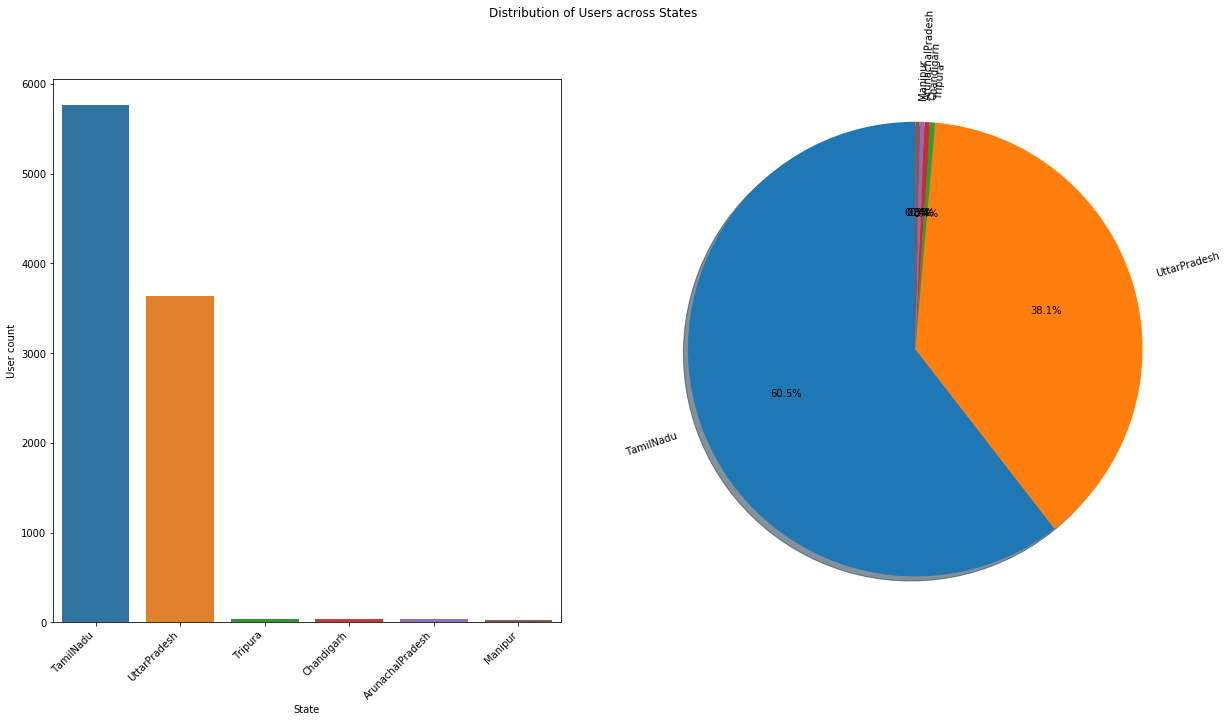

In [202]:
fig, ax = plt.subplots(1,2,figsize = (20,10))

sns.barplot(x="state", y="device_id", data=state_device_data,ax=ax[0])
ax[0].set(xlabel='State', ylabel='User count')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')

ax[1].pie(state_device_data['device_id'],  labels=state_device_data['state'], autopct='%1.1f%%',
        shadow=True, startangle=90, rotatelabels=True )
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right')


fig.suptitle("Distribution of Users across States")
plt.show()


#### TamilNadu (60.5%) has large user based follwed by UttarPradesh (38.1%) .

### Distribution of Users across Phone Brands

In [79]:
phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,-2638302274530537957,Samsung,Galaxy Grand 2
1,2687021466923970058,酷比,M1
2,-5080051514408049802,Xiaomi,小米note
3,-4909264578655508813,Samsung,A788t
4,-965141125520486405,Meizu,魅蓝Note 2


In [80]:
brand_device_data=phone_brand_device_model.groupby('phone_brand').device_id.nunique().reset_index().sort_values(['device_id'], ascending=False).head(10)

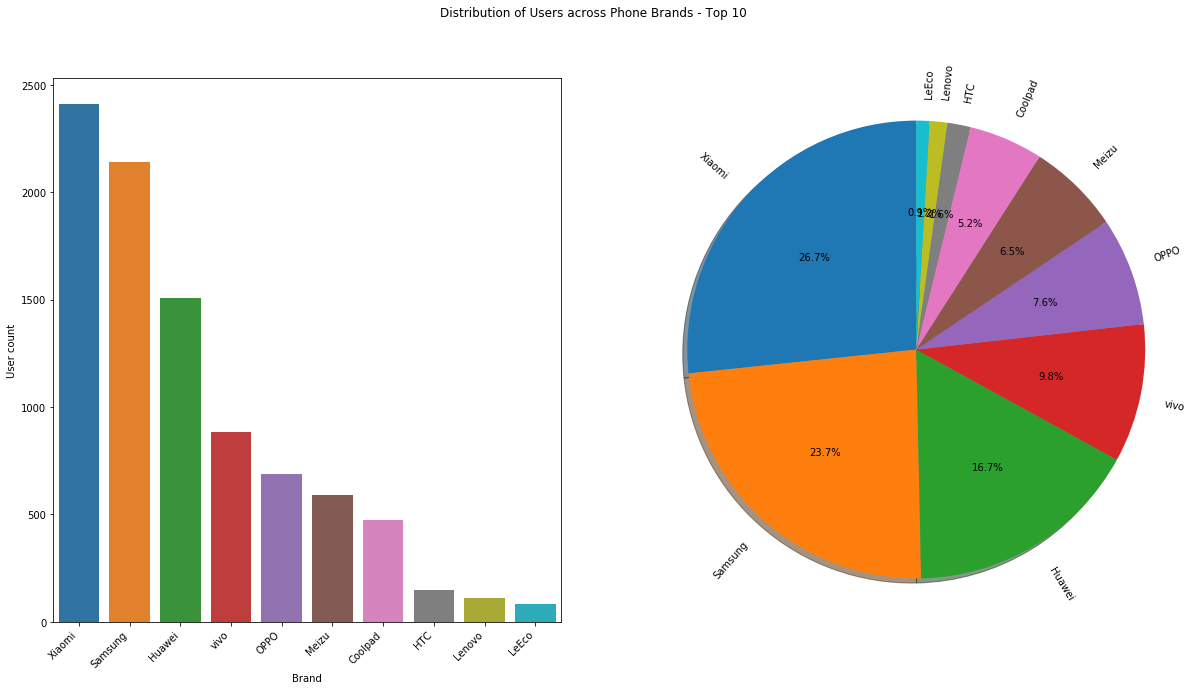

In [207]:
fig1, ax1 = plt.subplots(1,2,figsize = (20,10))

sns.barplot(x="phone_brand", y="device_id", data=brand_device_data,ax=ax1[0])
ax1[0].set(xlabel='Brand', ylabel='User count')
ax1[0].set_xticklabels(ax1[0].get_xticklabels(), rotation=45, horizontalalignment='right')

ax1[1].pie(brand_device_data['device_id'],  labels=brand_device_data['phone_brand'], autopct='%1.1f%%',
        shadow=True, startangle=90, rotatelabels=True )
ax1[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1[1].set_xticklabels(ax1[1].get_xticklabels(), rotation=45, horizontalalignment='right')


fig1.suptitle("Distribution of Users across Phone Brands - Top 10")
plt.show()


#### Xiaomi (26.7%) has large userbase, follwed by Samsung (23.7%) and Huawei (16.7%)

In [82]:
model_device_data=phone_brand_device_model.groupby('device_model').device_id.nunique().reset_index().sort_values(['device_id'], ascending=False).head(10)

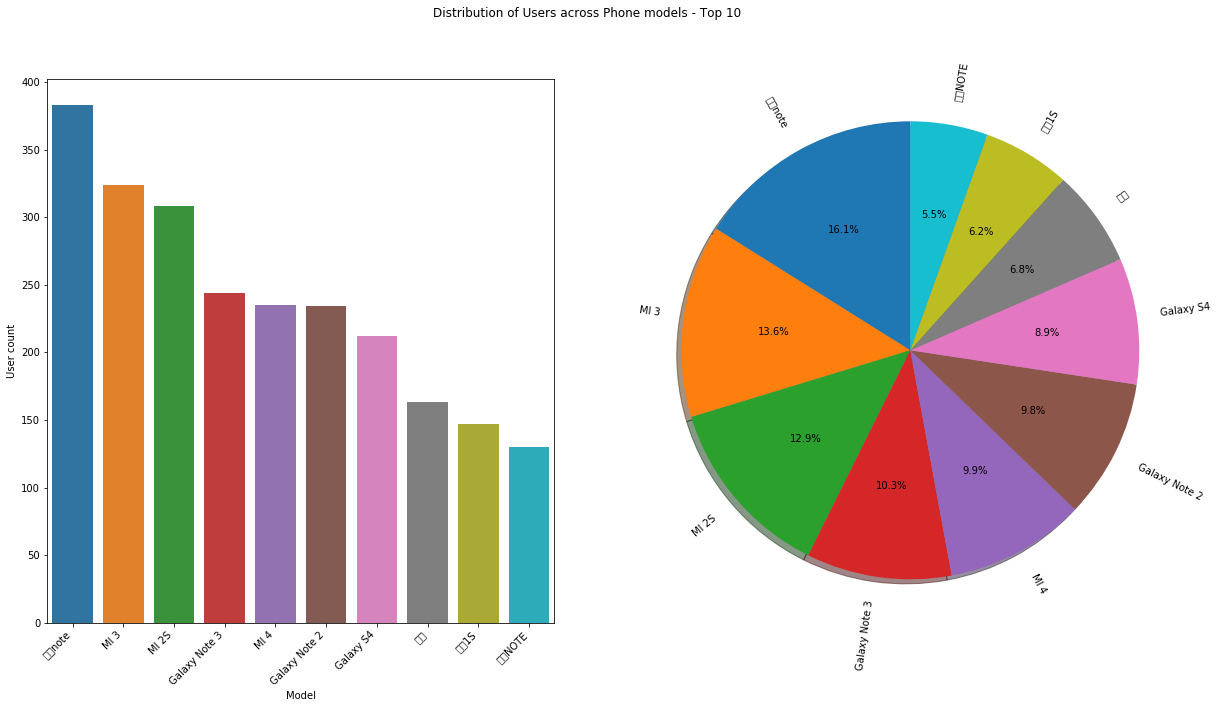

In [206]:
fig11, ax11 = plt.subplots(1,2,figsize = (20,10))

sns.barplot(x="device_model", y="device_id", data=model_device_data,ax=ax11[0])
ax11[0].set(xlabel='Model', ylabel='User count')
ax11[0].set_xticklabels(ax11[0].get_xticklabels(), rotation=45, horizontalalignment='right')

ax11[1].pie(model_device_data['device_id'],  labels=model_device_data['device_model'], autopct='%1.1f%%',
        shadow=True, startangle=90, rotatelabels=True )
ax11[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax11[1].set_xticklabels(ax11[1].get_xticklabels(), rotation=45, horizontalalignment='right')


fig11.suptitle("Distribution of Users across Phone models - Top 10")
plt.show()


#### note (16.1%) has large userbase, follwed by MI3 (13.6%), MI 25 (12.9%) and Galaxy Note 3 (10.3%)

In [83]:
gender_age_train.head()

,device_id,gender,age,group
0,-2638302274530537957,F,29.0,F29-32
1,2687021466923970058,F,25.0,F24-26
2,-5080051514408049802,F,27.0,F27-28
3,-4909264578655508813,M,19.0,M22-
4,-965141125520486405,F,38.0,F33-42


In [84]:
gender_device_data=gender_age_train.groupby('gender').device_id.nunique().reset_index().sort_values(['device_id'], ascending=False)
gender_device_data.head()

,gender,device_id
1,M,5990
0,F,3573


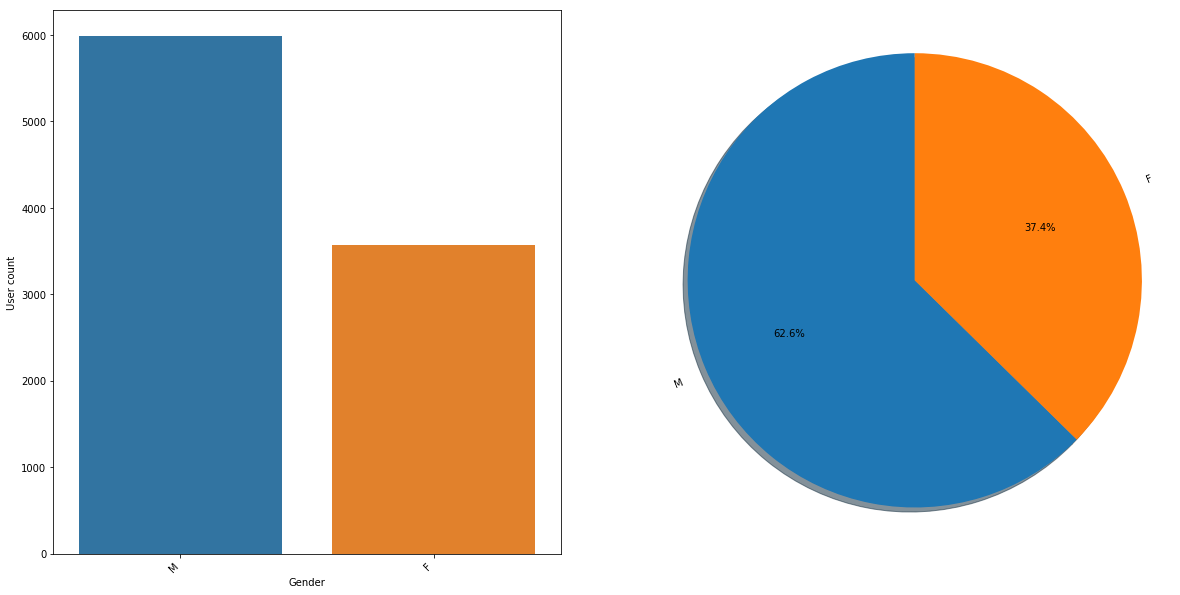

In [208]:
fig2, ax2 = plt.subplots(1,2,figsize = (20,10))

sns.barplot(x="gender", y="device_id", data=gender_device_data,ax=ax2[0])
ax2[0].set(xlabel='Gender', ylabel='User count')
ax2[0].set_xticklabels(ax2[0].get_xticklabels(), rotation=45, horizontalalignment='right')

ax2[1].pie(gender_device_data['device_id'],  labels=gender_device_data['gender'], autopct='%1.1f%%',
        shadow=True, startangle=90, rotatelabels=True )
ax2[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2[1].set_xticklabels(ax2[1].get_xticklabels(), rotation=45, horizontalalignment='right')


fig.suptitle("Distribution of Users across States")
plt.show()


#### More male users (62.6%) than female (37.4%)

In [ ]:
user_device_data=gender_age_train.set_index('device_id').join(event_data.set_index('device_id')).reset_index()[['device_id','gender','age','group','state']].drop_duplicates()

In [87]:
user_device_data.head()

,device_id,gender,age,group,state
0,-1000572055892391496,F,27.0,F27-28,UttarPradesh
10,-1002079624347534227,F,40.0,F33-42,UttarPradesh
25,-1003040252653187383,M,44.0,M39+,UttarPradesh
49,-1010359452115832043,M,45.0,M39+,TamilNadu
51,-1011114579425797433,M,20.0,M22-,UttarPradesh


In [88]:
gender_device_summary_data=user_device_data.groupby(['gender','state']).device_id.nunique().reset_index().sort_values(['device_id'], ascending=False)
gender_device_summary_data.head()

,gender,state,device_id
9,M,TamilNadu,3605
11,M,UttarPradesh,2291
3,F,TamilNadu,2165
5,F,UttarPradesh,1344
6,M,ArunachalPradesh,21


In [89]:
gender_m_device_summary_data=gender_device_summary_data[gender_device_summary_data['gender']=='M'].groupby(['state']).agg({'device_id': sum}).reset_index().sort_values(['device_id'], ascending=False).rename(columns={'device_id':'male_count'})
gender_f_device_summary_data=gender_device_summary_data[gender_device_summary_data['gender']=='F'].groupby(['state']).agg({'device_id': sum}).reset_index().sort_values(['device_id'], ascending=False).rename(columns={'device_id':'female_count'})

In [90]:
gender_summary_data= gender_m_device_summary_data.set_index('state').join(gender_f_device_summary_data.set_index('state')).reset_index()

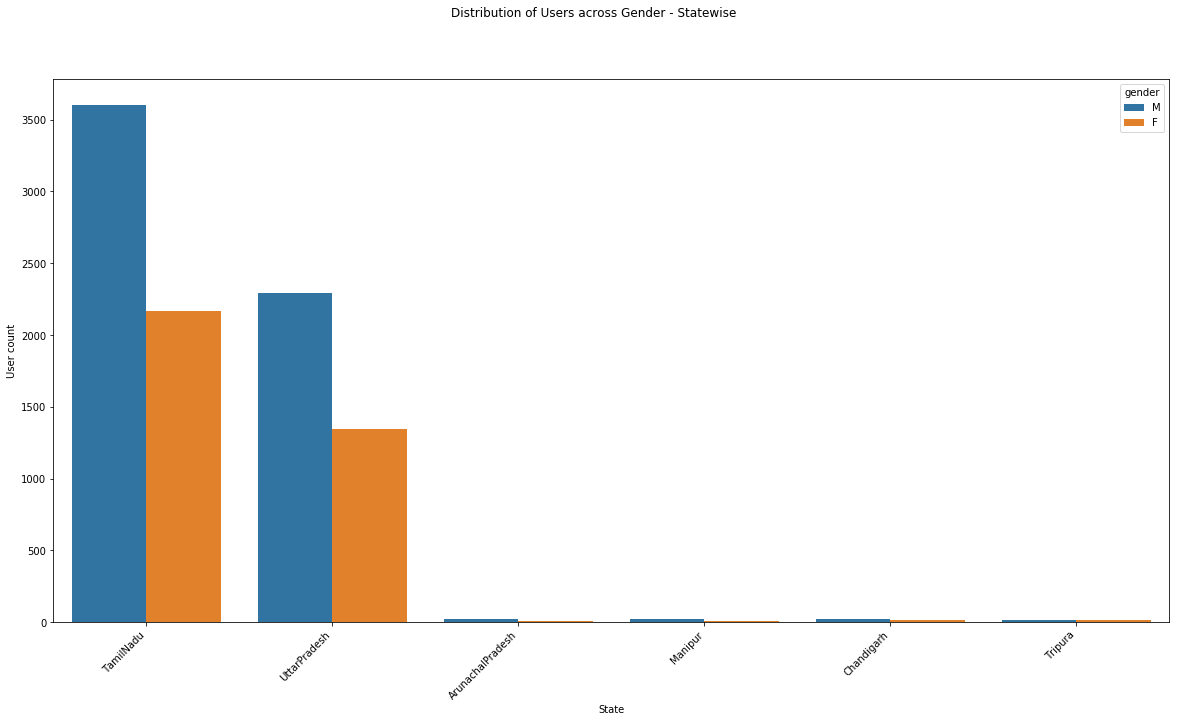

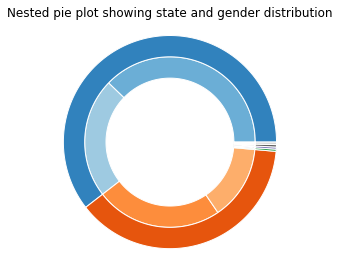

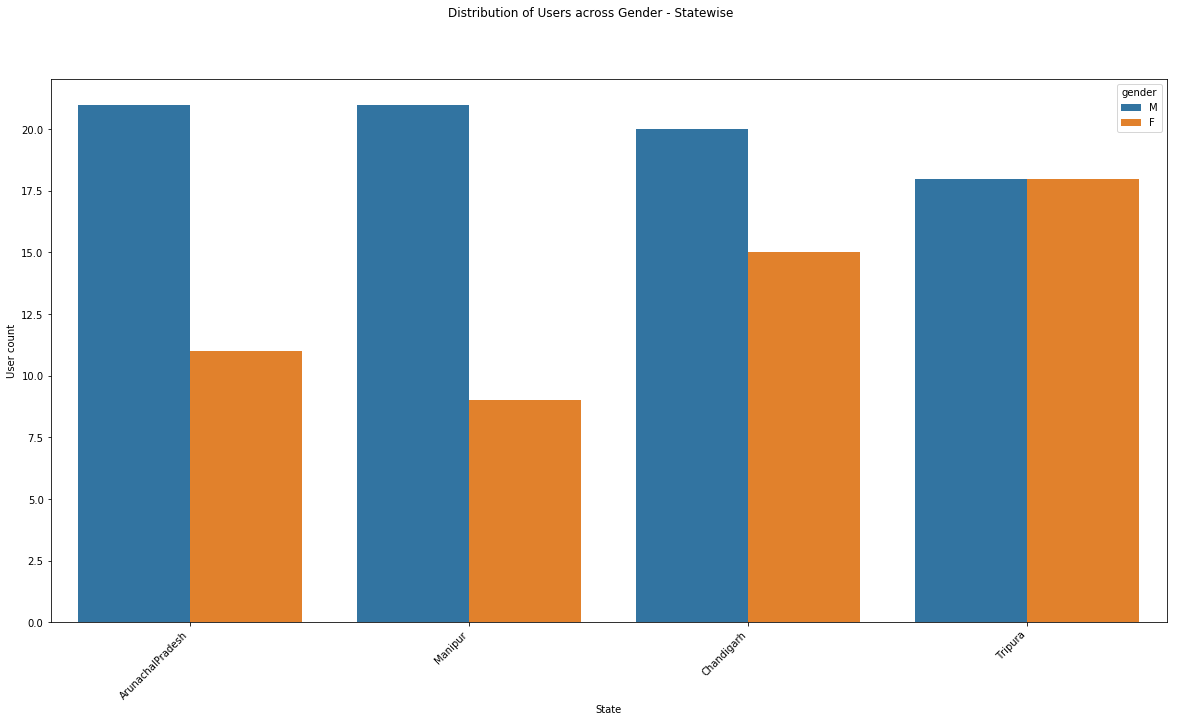

In [213]:
fig3, ax3 = plt.subplots(figsize = (20,10))

sns.barplot(x="state", y="device_id", data=gender_device_summary_data,ax=ax3,hue='gender')
ax3.set(xlabel='State', ylabel='User count')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, horizontalalignment='right')

fig3.suptitle("Distribution of Users across Gender - Statewise")

fig4, ax4 = plt.subplots(subplot_kw=dict(polar=True))

size = 0.2
vals = gender_summary_data[['male_count','female_count']].values
valsnorm = vals/np.sum(vals)*2*np.pi


valsleft = np.cumsum(np.append(0, valsnorm.flatten()[:-1])).reshape(vals.shape)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(vals))*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10,12,14,16,18,20,22]))


ax4.bar(x=valsleft.flatten(),
       width=valsnorm.flatten(), bottom=1-2*size, height=size,
       color=inner_colors, edgecolor='w', linewidth=1, align="edge")



ax4.bar(x=valsleft[:, 0],
       width=valsnorm.sum(axis=1), bottom=1-size, height=size,
       color=outer_colors, edgecolor='w', linewidth=1, align="edge")


ax4.set(title="Nested pie plot showing state and gender distribution")
ax4.set_axis_off()


fig31, ax31 = plt.subplots(figsize = (20,10))

sns.barplot(x="state", y="device_id", data=gender_device_summary_data[~gender_device_summary_data['state'].isin(['TamilNadu','UttarPradesh'])],ax=ax31,hue='gender')
ax31.set(xlabel='State', ylabel='User count')
ax31.set_xticklabels(ax31.get_xticklabels(), rotation=45, horizontalalignment='right')

fig31.suptitle("Distribution of Users across Gender - Statewise")

plt.show()


#### All state have more males user than female, expect Tripura

Text(0.5, 0.98, 'Distribution of Users across Age Segments.')

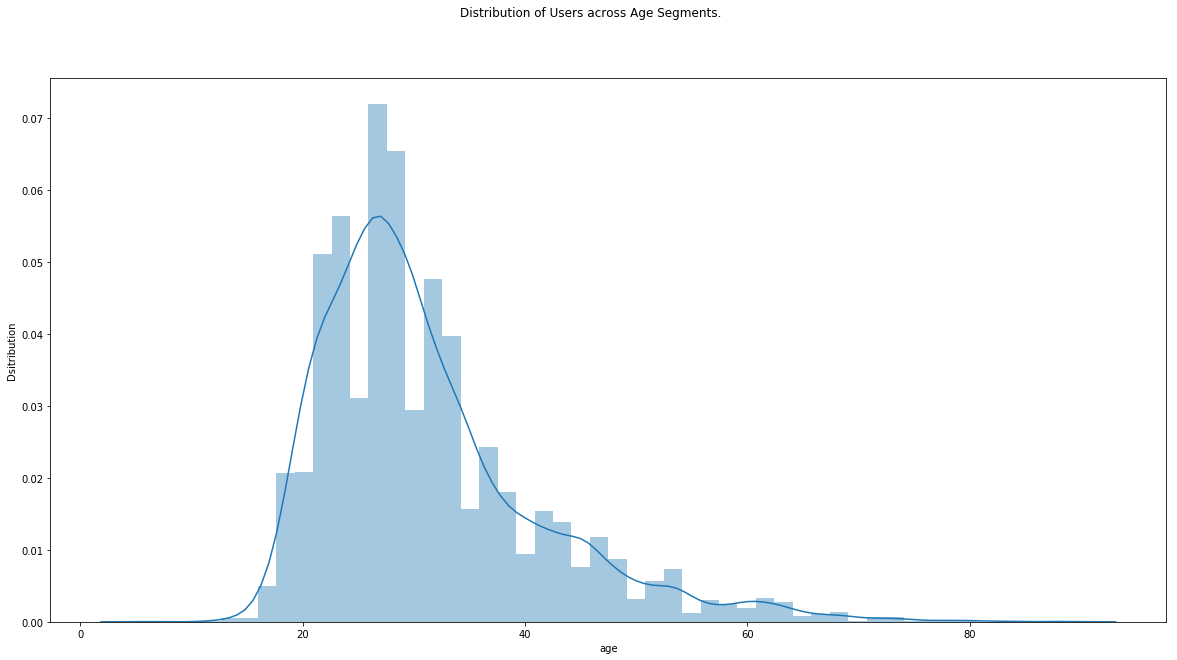

In [221]:
fig41, ax41 = plt.subplots(figsize = (20,10))
ax41.set(xlabel='Age', ylabel='Dsitribution')
sns.distplot(gender_age_train['age'], ax=ax41)
fig41.suptitle("Distribution of Users across Age Segments.")

#### Distribution plot above shows most of users are between age group 20-35.

In [93]:
brand_model_gender_data=gender_age_train.set_index('device_id').join(phone_brand_device_model.set_index('device_id')).reset_index()

In [94]:
brand_model_gender_data.head()
brand_gender_summary_data=brand_model_gender_data.groupby(['gender','phone_brand']).device_id.count().reset_index().sort_values(['device_id'], ascending=False).head(15)
brand_gender_summary_data.head()

,gender,phone_brand,device_id
71,M,Xiaomi,1511
69,M,Samsung,1295
60,M,Huawei,943
12,F,Xiaomi,898
10,F,Samsung,844


In [225]:
brand_gender_summary_data.head()

,gender,phone_brand,device_id
71,M,Xiaomi,1511
69,M,Samsung,1295
60,M,Huawei,943
12,F,Xiaomi,898
10,F,Samsung,844


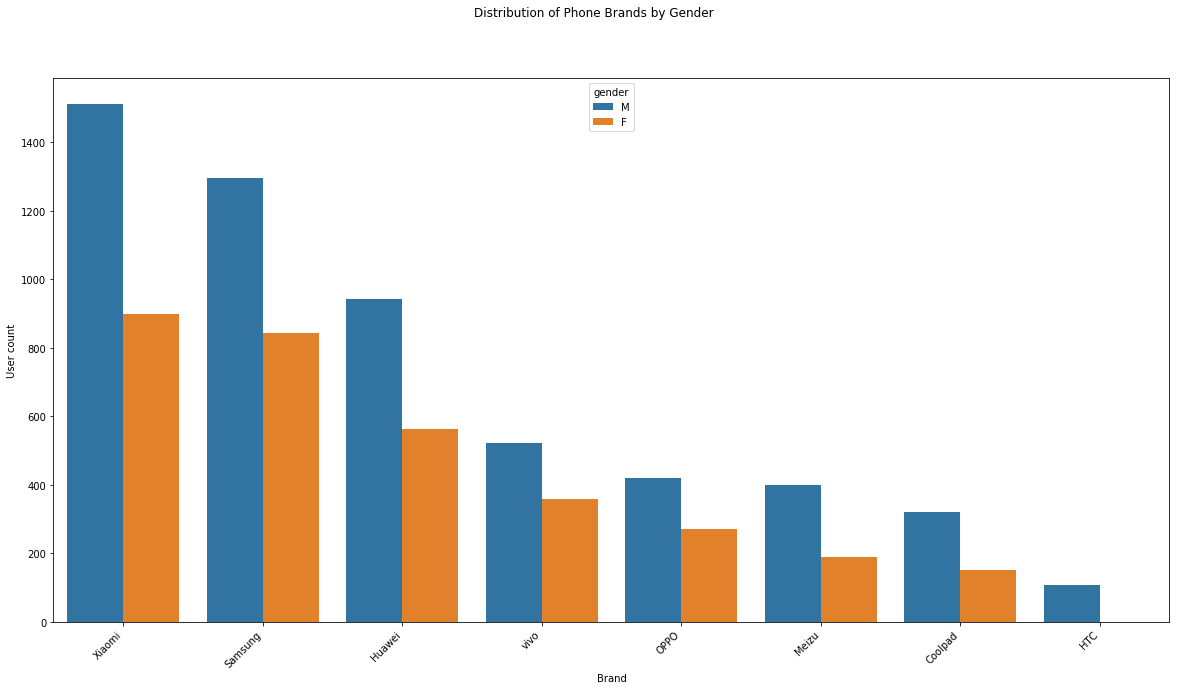

In [219]:
fig5, ax5 = plt.subplots(figsize = (20,10))

sns.barplot(x="phone_brand", y="device_id", data=brand_gender_summary_data,ax=ax5,hue='gender')
ax5.set(xlabel='Brand', ylabel='User count')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, horizontalalignment='right')

fig5.suptitle("Distribution of Phone Brands by Gender")

plt.show()


#### Male users prefer Xiaomi and Samsung, while female user like Xiaomi and Samsung brand equally.

In [222]:
brand_model_gender_data.head()
model_gender_summary_data=brand_model_gender_data.groupby(['gender','device_model']).device_id.count().reset_index().sort_values(['device_id'], ascending=False).head(15)
model_gender_summary_data.head()

,gender,device_model,device_id
966,M,MI 3,223
1323,M,红米note,219
965,M,MI 2S,185
564,F,红米note,164
967,M,MI 4,152


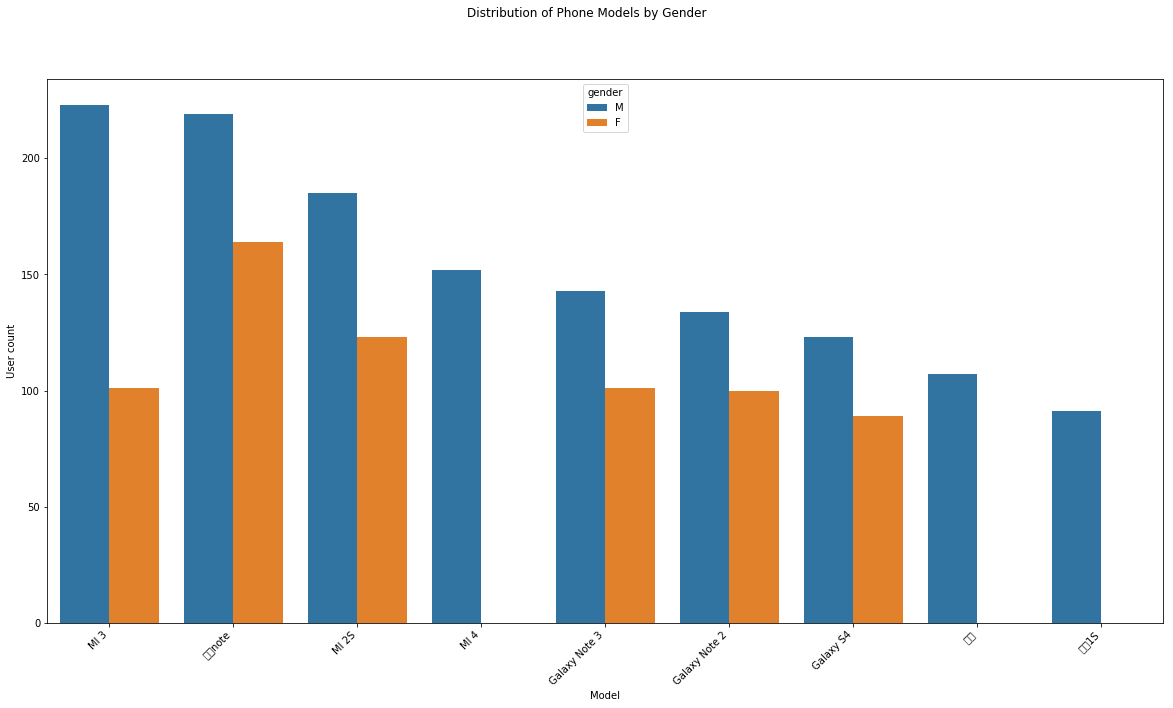

In [223]:
fig6, ax6 = plt.subplots(figsize = (20,10))

sns.barplot(x="device_model", y="device_id", data=model_gender_summary_data,ax=ax6,hue='gender')
ax6.set(xlabel='Model', ylabel='User count')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, horizontalalignment='right')

fig6.suptitle("Distribution of Phone Models by Gender")


plt.show()


#### MI 3 and note are popular models amoung female user. Female user prefer note and MI 25 model.

In [224]:
user_device_data.head()

,device_id,gender,age,group,state
0,-1000572055892391496,F,27.0,F27-28,UttarPradesh
10,-1002079624347534227,F,40.0,F33-42,UttarPradesh
25,-1003040252653187383,M,44.0,M39+,UttarPradesh
49,-1010359452115832043,M,45.0,M39+,TamilNadu
51,-1011114579425797433,M,20.0,M22-,UttarPradesh


In [99]:
user_device_state_data=user_device_data.set_index('device_id').join(phone_brand_device_model.set_index('device_id')).reset_index()
user_device_state_data.head()

,device_id,gender,age,group,state,phone_brand,device_model
0,-1000572055892391496,F,27.0,F27-28,UttarPradesh,OPPO,R819T
1,-1002079624347534227,F,40.0,F33-42,UttarPradesh,海信,T958
2,-1003040252653187383,M,44.0,M39+,UttarPradesh,Xiaomi,MI 3
3,-1010359452115832043,M,45.0,M39+,TamilNadu,Samsung,Galaxy Mega 6.3
4,-1011114579425797433,M,20.0,M22-,UttarPradesh,Samsung,S7898


In [100]:
user_device_state_data['group'].drop_duplicates()

0     F27-28
1     F33-42
2       M39+
4       M22-
6     M32-38
9     F29-32
13    M23-26
17    M27-28
23    F24-26
30      F43+
31    M29-31
36      F23-
Name: group, dtype: object

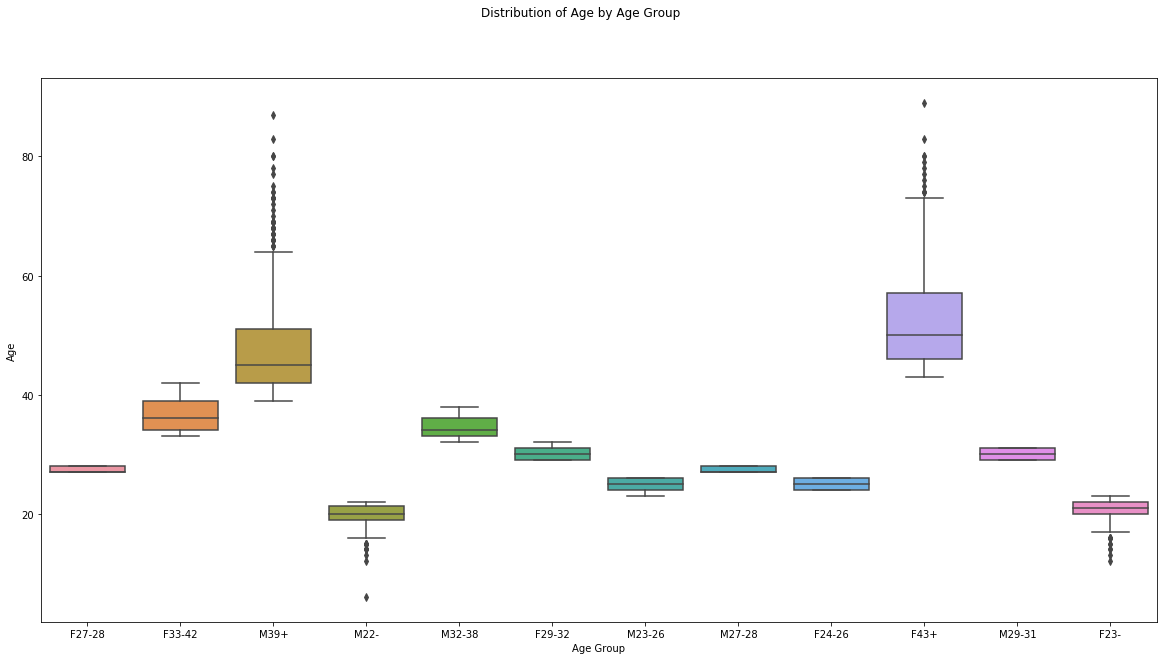

In [256]:
fig7, ax7 = plt.subplots(figsize = (20,10))
sns.boxplot(data=user_device_state_data,x='group',y='age', ax=ax7)
ax7.set(xlabel='Age Group', ylabel='Age')
fig7.suptitle('Distribution of Age by Age Group')
plt.show()

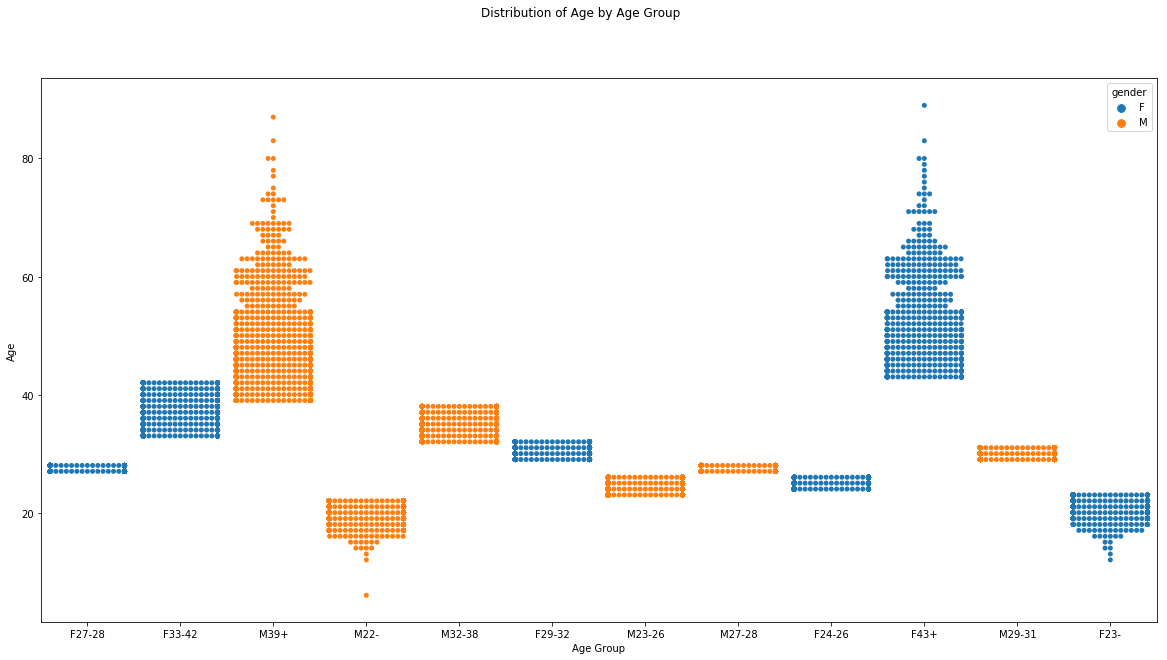

In [257]:
fig7, ax7 = plt.subplots(figsize = (20,10))
sns.swarmplot(data=user_device_state_data,x='group',y='age', ax=ax7, hue='gender')
ax7.set(xlabel='Age Group', ylabel='Age')
fig7.suptitle('Distribution of Age by Age Group')
plt.show()

#### Above plot shows gender and age apre properly assigned to correct age group.

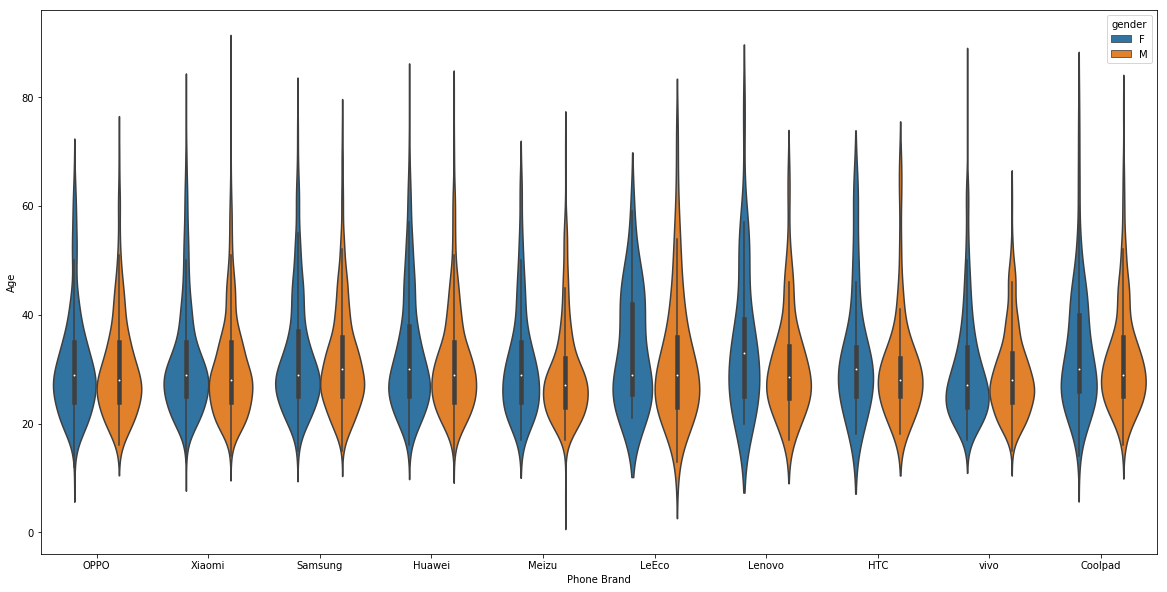

In [259]:
fig8, ax8 = plt.subplots(figsize = (20,10))
sns.violinplot(data=user_device_state_data[user_device_state_data['phone_brand'].isin(brand_device_data['phone_brand'].values)],x='phone_brand',y='age', ax=ax8, hue='gender')
ax8.set(xlabel='Phone Brand', ylabel='Age')
plt.show()



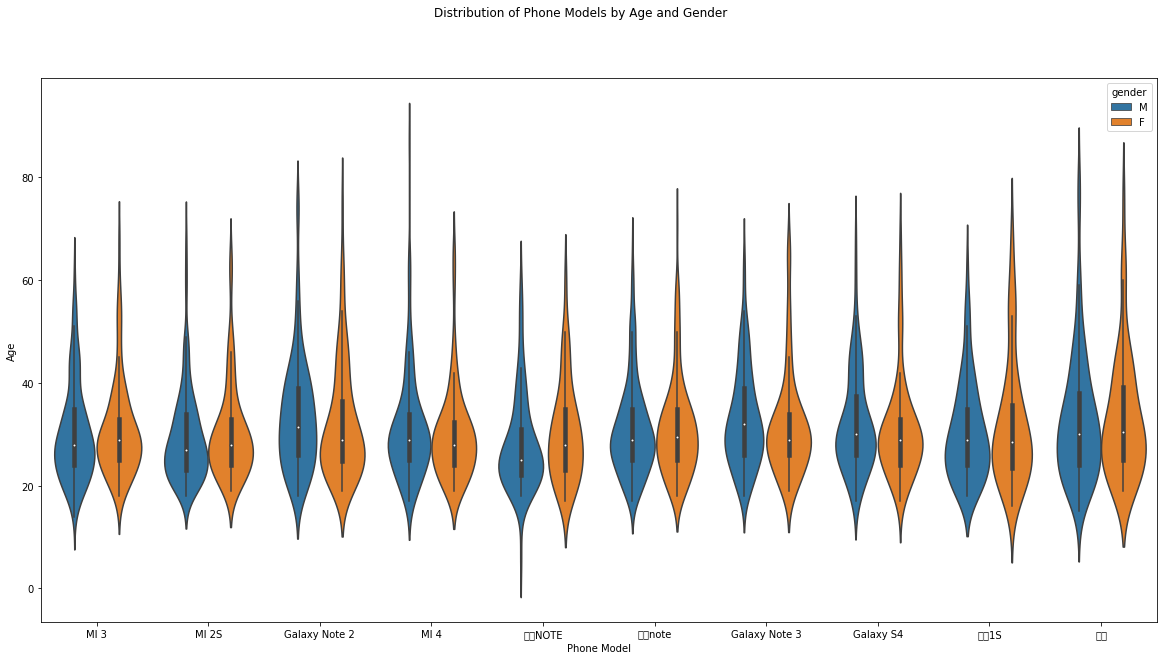

In [262]:
fig9, ax9 = plt.subplots(figsize = (20,10))
sns.violinplot(data=user_device_state_data[user_device_state_data['device_model'].isin(model_device_data['device_model'].values)],x='device_model',y='age', ax=ax9, hue='gender')

ax9.set(xlabel='Phone Model', ylabel='Age')
fig9.suptitle('Distribution of Phone Models by Age and Gender')
plt.show()

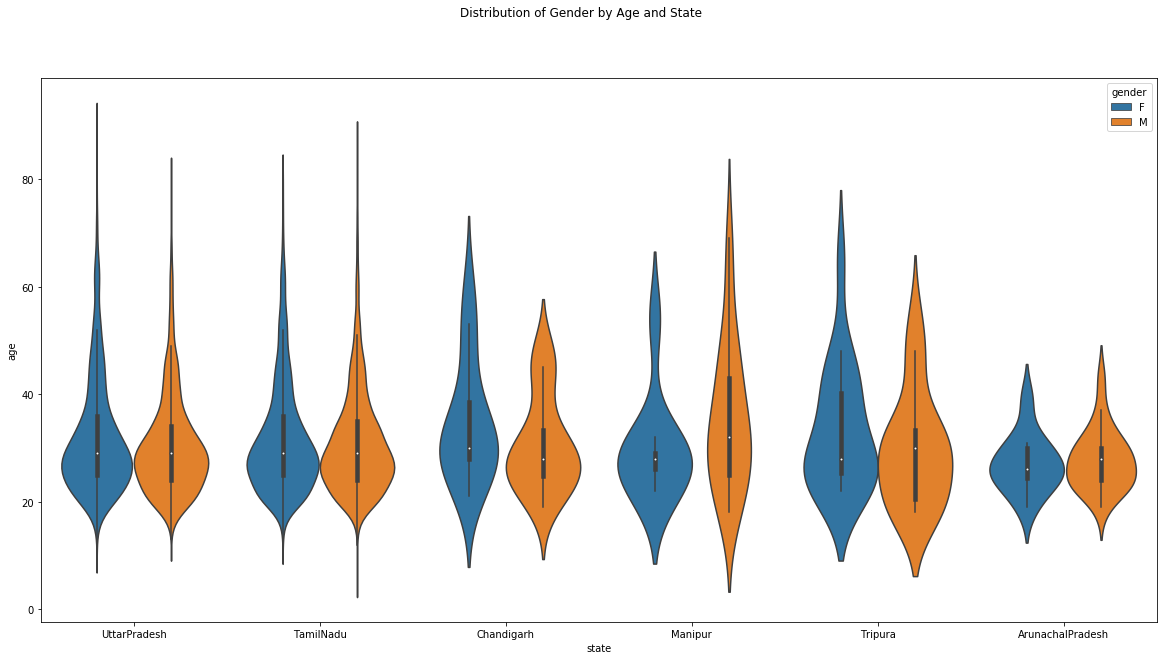

In [263]:
fig10, ax10 = plt.subplots(figsize = (20,10))
sns.violinplot(data=user_device_state_data,x='state',y='age', ax=ax10, hue='gender')
ax8.set(xlabel='State', ylabel='Age')
fig10.suptitle("Distribution of Gender by Age and State")
plt.show()


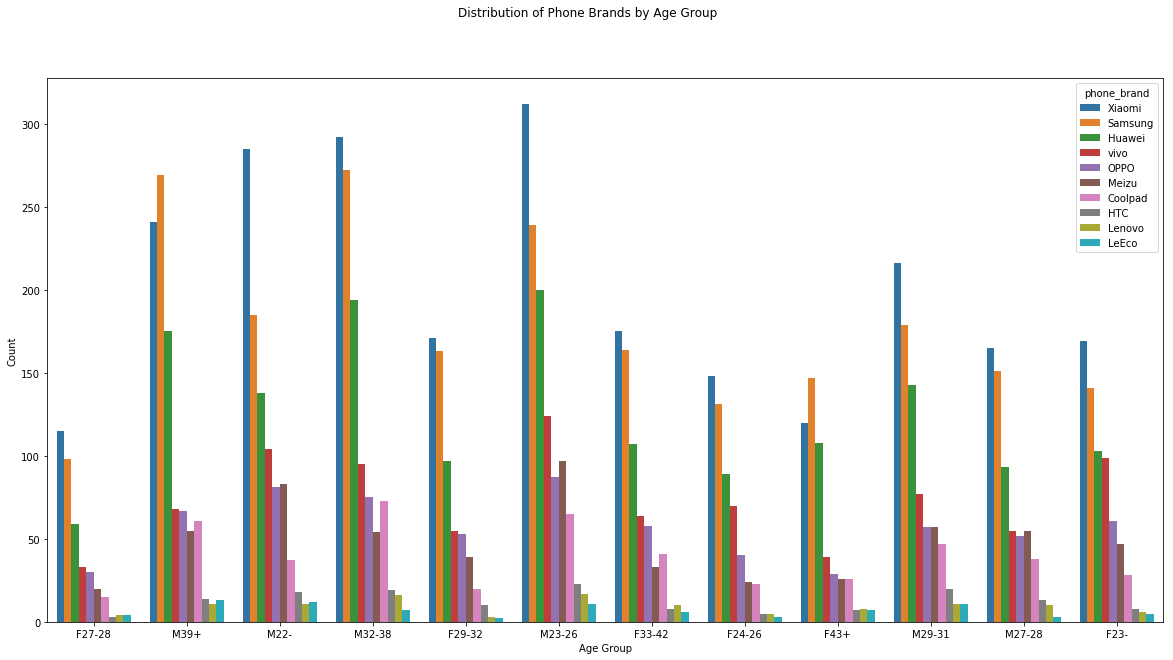

In [265]:
fig11, ax11 = plt.subplots(figsize = (20,10))
sns.countplot(x='group', data=user_device_state_data[user_device_state_data['phone_brand'].isin(brand_device_data['phone_brand'].values)], hue='phone_brand', orient='h',hue_order=brand_device_data['phone_brand'].values)
ax11.set(xlabel='Age Group', ylabel='Count')
fig11.suptitle("Distribution of Phone Brands by Age Group")
plt.show()

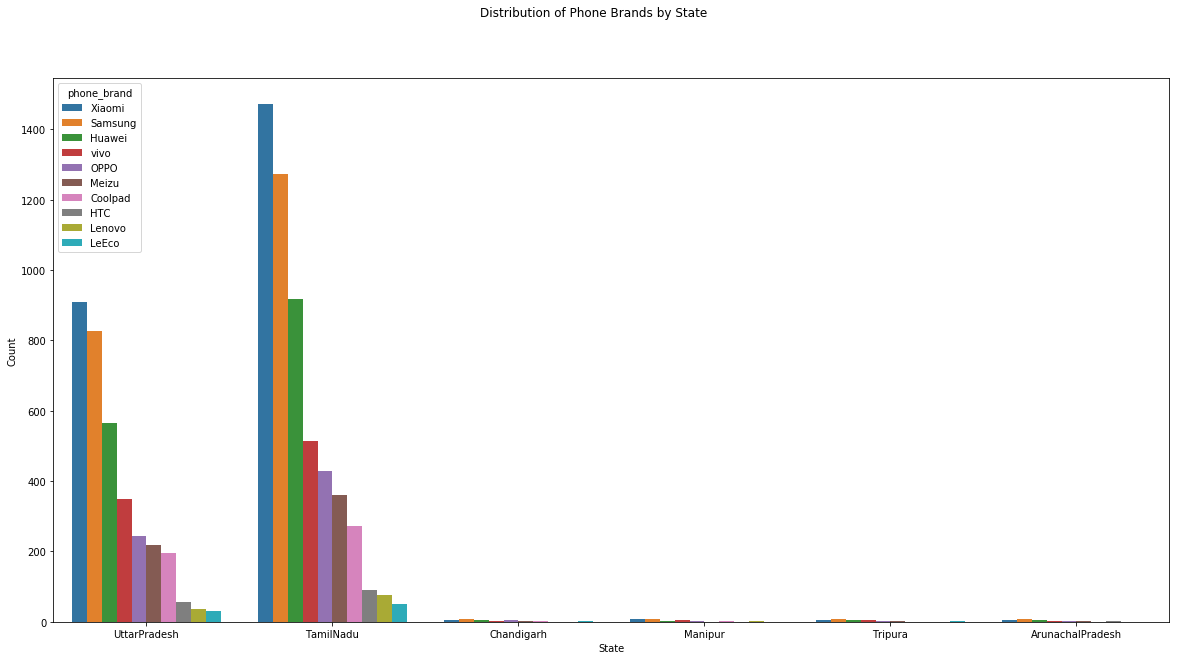

In [266]:
fig111, ax111 = plt.subplots(figsize = (20,10))
sns.countplot(x='state', data=user_device_state_data[user_device_state_data['phone_brand'].isin(brand_device_data['phone_brand'].values)], hue='phone_brand', orient='h',hue_order=brand_device_data['phone_brand'].values)
ax111.set(xlabel='State', ylabel='Count')
fig111.suptitle("Distribution of Phone Brands by State")
plt.show()

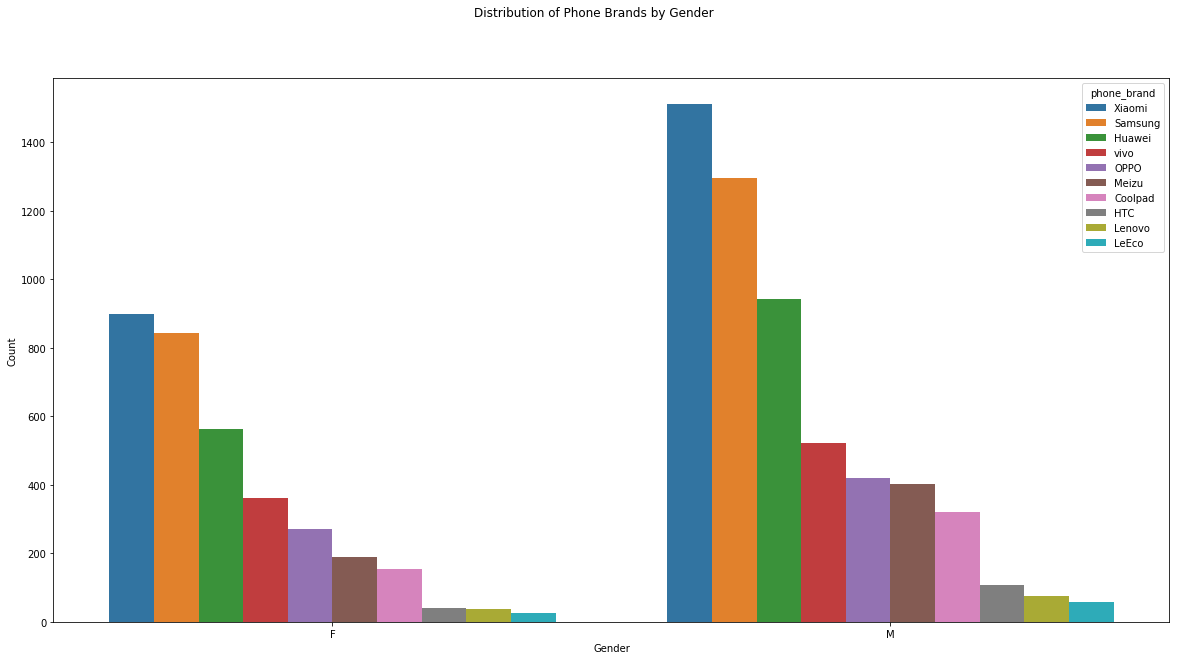

In [267]:
fig112, ax112 = plt.subplots(figsize = (20,10))
sns.countplot(x='gender', data=user_device_state_data[user_device_state_data['phone_brand'].isin(brand_device_data['phone_brand'].values)], hue='phone_brand', orient='h',hue_order=brand_device_data['phone_brand'].values)
ax112.set(xlabel='Gender', ylabel='Count')
fig112.suptitle("Distribution of Phone Brands by Gender")
plt.show()

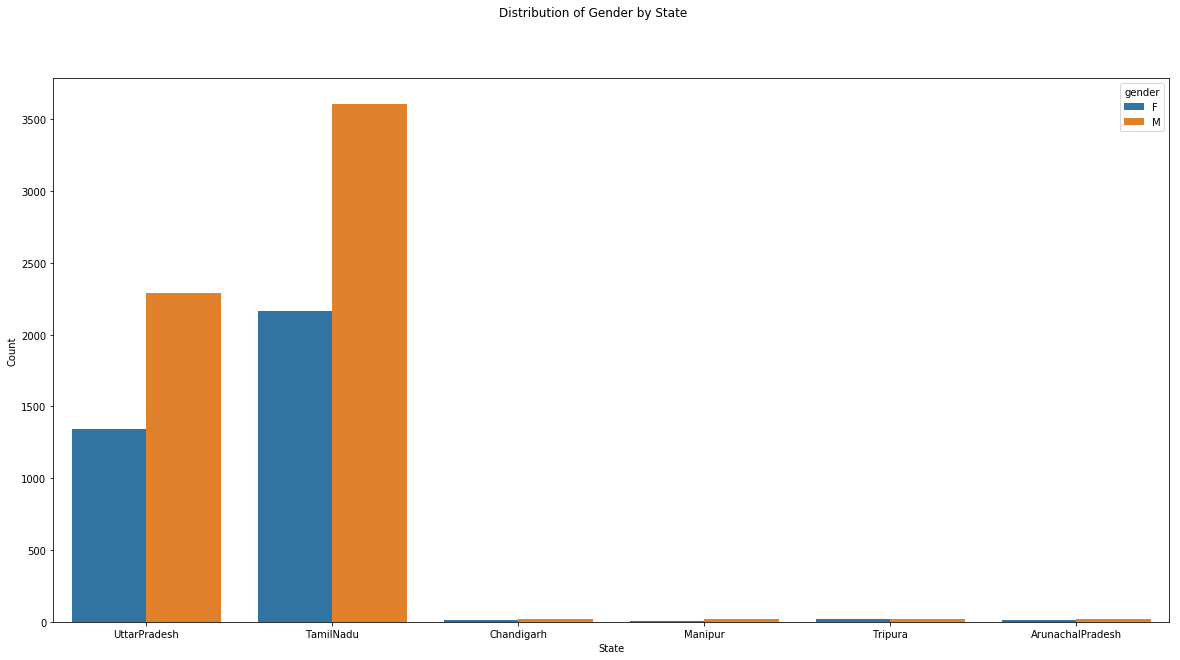

In [268]:
fig114, ax114 = plt.subplots(figsize = (20,10))
sns.countplot(x='state', data=user_device_state_data, hue='gender', orient='h')
ax114.set(xlabel='State', ylabel='Count')
fig114.suptitle("Distribution of Gender by State")
plt.show()

In [250]:
user_device_state_data['device_count']= 1

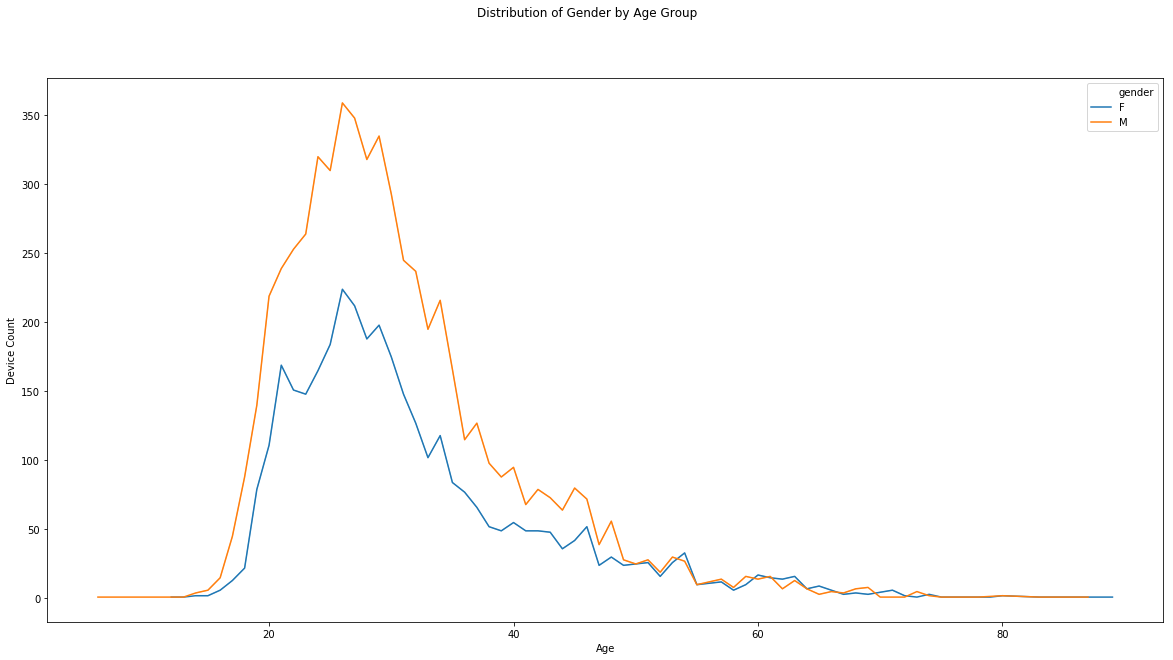

In [269]:
fig115, ax115 = plt.subplots(figsize = (20,10))
sns.lineplot(x='age', y='device_count', data=user_device_state_data, hue='gender',estimator='sum')
ax115.set(xlabel='Age', ylabel='Device Count')
fig115.suptitle("Distribution of Gender by Age Group")
plt.show()

#### Distribution of gender by age show similar charateristics. There are more male users than female across age groups. Howere there are few exceptions for ages greater than 55.

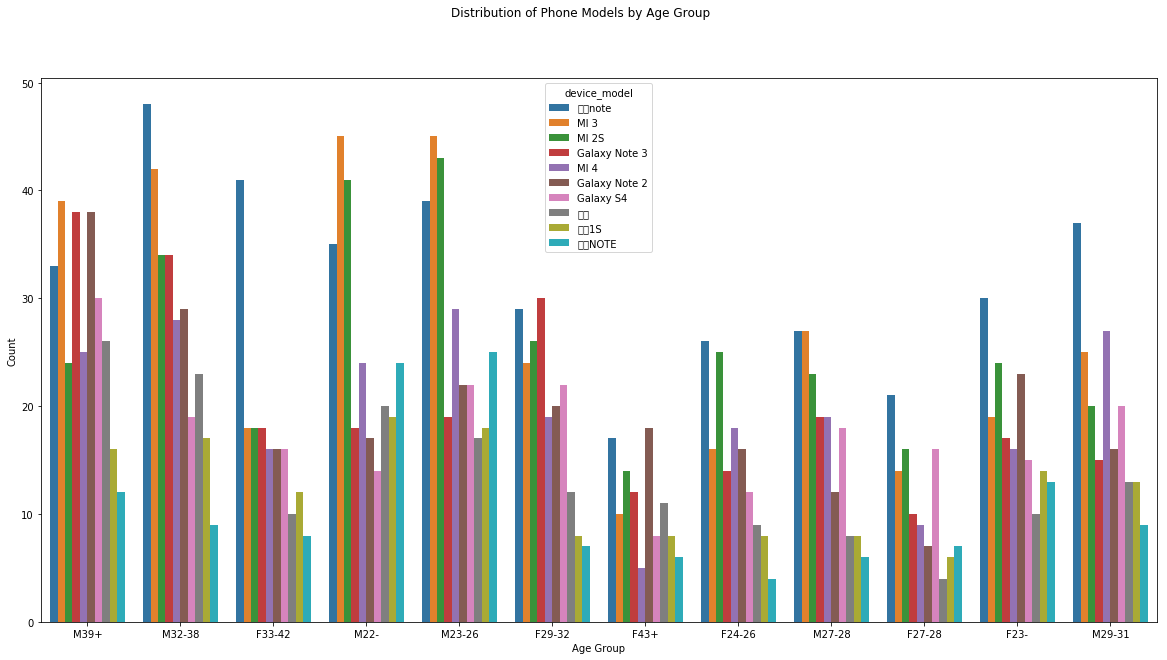

In [270]:
fig11, ax11 = plt.subplots(figsize = (20,10))
sns.countplot(x='group', data=user_device_state_data[user_device_state_data['device_model'].isin(model_device_data['device_model'].values)], hue='device_model', orient='h',hue_order=model_device_data['device_model'].values)
ax11.set(xlabel='Age Group', ylabel='Count')
fig11.suptitle('Distribution of Phone Models by Age Group')
plt.show()

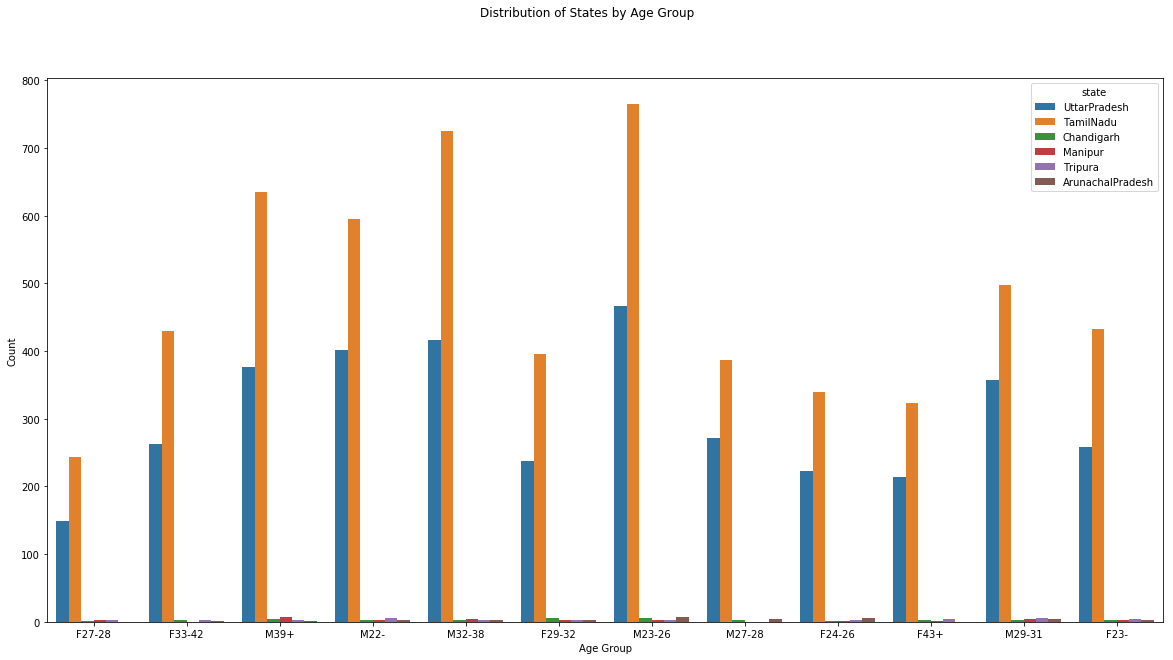

In [271]:
fig12, ax12 = plt.subplots(figsize = (20,10))
sns.countplot(x='group', data=user_device_state_data, hue='state', orient='v')
ax12.set(xlabel='Age Group', ylabel='Count')
fig12.suptitle('Distribution of States by Age Group')
plt.show()

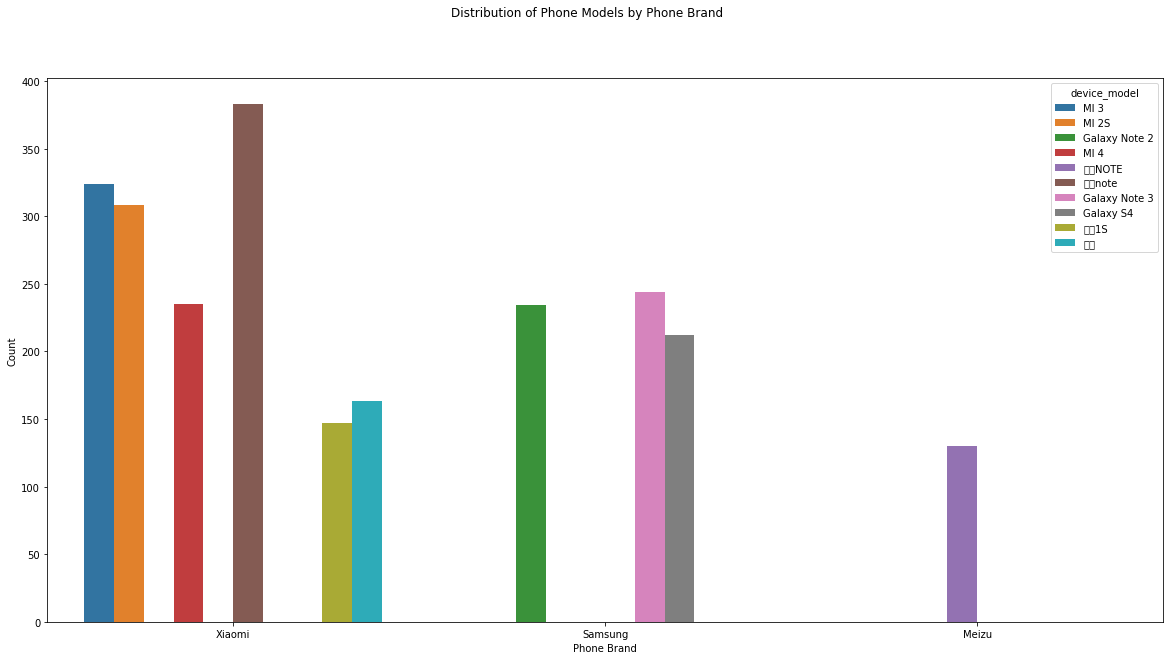

In [272]:
fig11, ax11 = plt.subplots(figsize = (20,10))
sns.countplot(x='phone_brand', data=user_device_state_data[(user_device_state_data['phone_brand'].isin(brand_device_data['phone_brand'].values)) & (user_device_state_data['device_model'].isin(model_device_data['device_model'].values))], hue='device_model', orient='h')
ax11.set(xlabel='Phone Brand', ylabel='Count')
fig11.suptitle('Distribution of Phone Models by Phone Brand')
plt.show()

In [119]:
event_data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
timestamp,,,,,,,
2016-05-02 19:30:40,21450,-2638302274530537957,2016-05-02 19:30:40,91.291695,23.860241,Agartala,Tripura
2016-05-05 20:50:04,23856,-2638302274530537957,2016-05-05 20:50:04,91.291695,23.860241,Agartala,Tripura
2016-05-03 00:05:22,29540,-2638302274530537957,2016-05-03 00:05:22,91.291695,23.860241,Agartala,Tripura
2016-05-01 14:34:56,86657,-2638302274530537957,2016-05-01 14:34:56,91.291695,23.860241,Agartala,Tripura
2016-05-05 20:47:01,115928,-2638302274530537957,2016-05-05 20:47:01,91.291695,23.860241,Agartala,Tripura


In [183]:
#fig12, ax12 = plt.subplots(figsize = (20,10))
event_time_index_data=event_data.groupby(['timestamp']).device_id.count().reset_index()
#event_time_index_data.index = pd.to_datetime(event_time_index_data.timestamp, dayfirst=True)
event_time_index_data.head()

,timestamp,device_id
0,2016-04-30 23:53:05,1
1,2016-04-30 23:53:11,1
2,2016-04-30 23:53:12,1
3,2016-04-30 23:53:14,1
4,2016-04-30 23:53:20,1


In [308]:
event_time_index_data.reset_index()
event_time_index_data['timestamp']=pd.to_datetime(event_time_index_data['timestamp'])
event_time_index_data['timestamp'].head().dt.hour
event_time_index_data.timestamp.index
event_time_index_data['timestamp'].head()

0   2016-04-30 23:53:05
1   2016-04-30 23:53:11
2   2016-04-30 23:53:12
3   2016-04-30 23:53:14
4   2016-04-30 23:53:20
Name: timestamp, dtype: datetime64[ns]

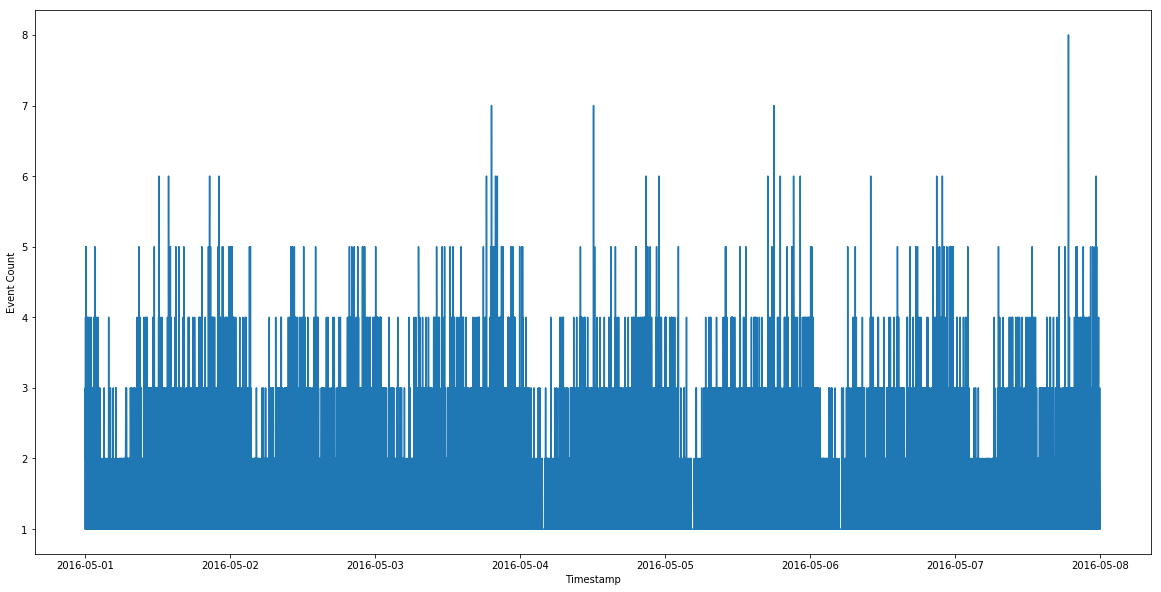

In [342]:
fig20, ax20 = plt.subplots(figsize = (20,10))
sns.lineplot(data=event_time_index_data.sample(20000),x='timestamp',y='device_id',estimator='sum')
ax20.set(xlabel='Timestamp', ylabel='Event Count')
plt.show()

In [ ]:
event_time_index_data.head(100)

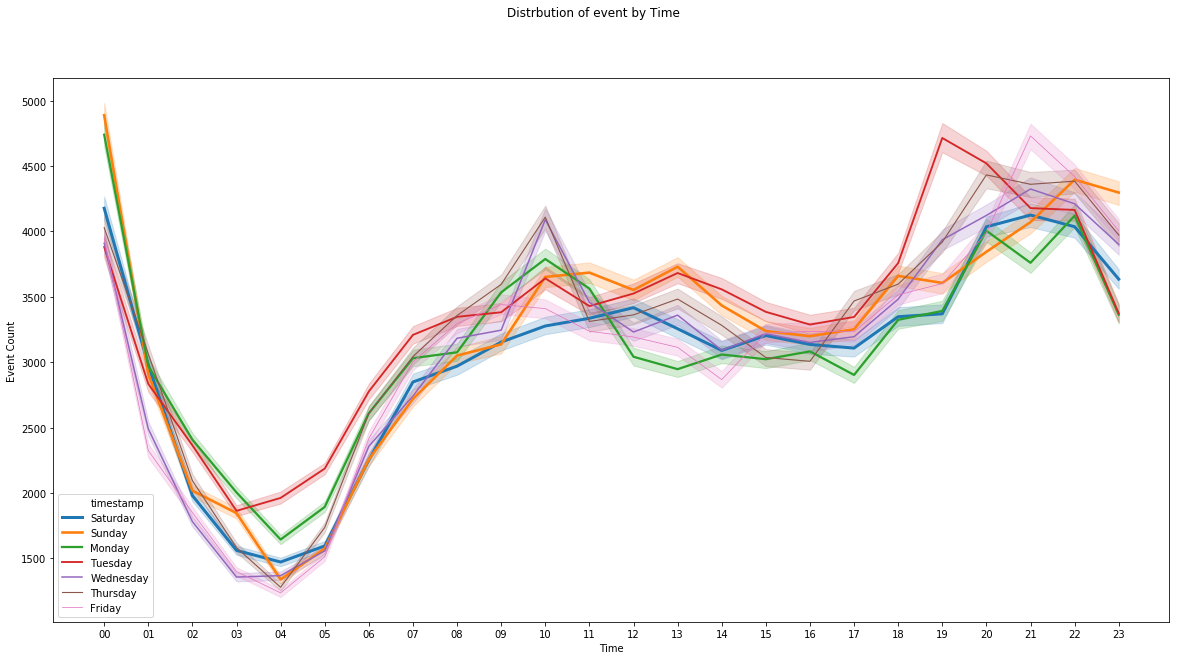

In [356]:
fig20, ax20 = plt.subplots(figsize = (20,10))
#plt.plot(event_time_index_data.head(1000).timestamp.dt.hour,event_time_index_data.head(1000).device_id)
event_sample_data=event_time_index_data
sns.lineplot(event_sample_data.timestamp.dt.strftime('%H'),event_sample_data.device_id, estimator='sum',hue=event_sample_data.timestamp.dt.strftime('%A'),size=event_sample_data.timestamp.dt.strftime('%A'))
ax20.set(xlabel='Time', ylabel='Event Count')
fig20.suptitle('Distrbution of event by Time')
plt.show()


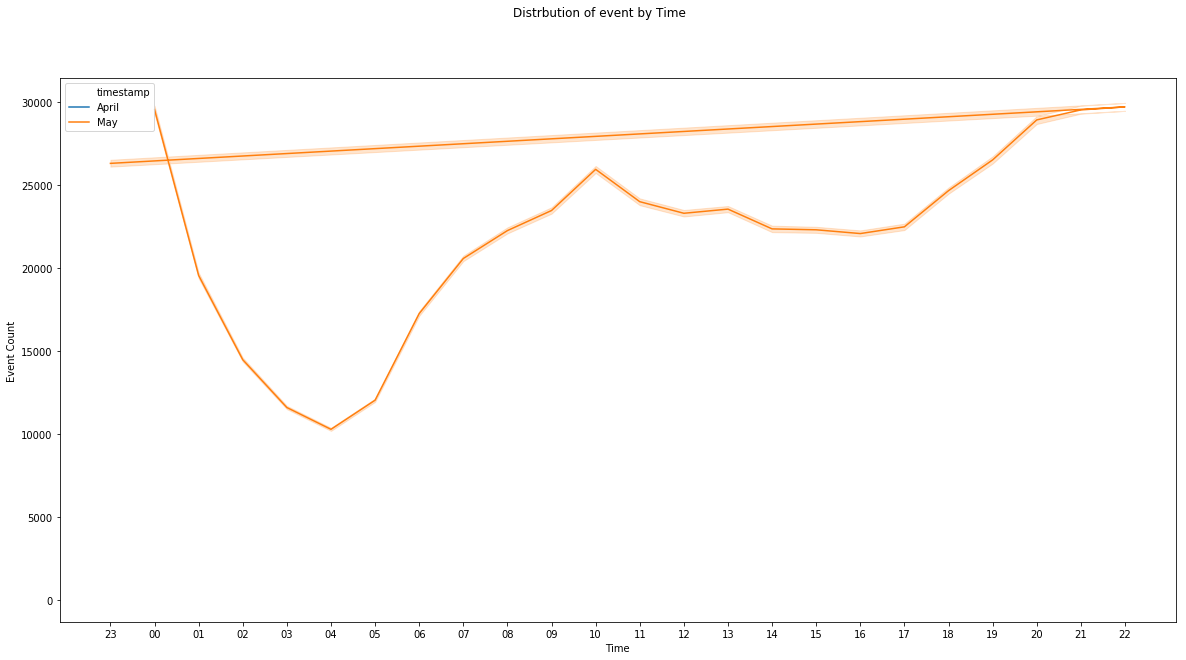

In [359]:
fig20, ax20 = plt.subplots(figsize = (20,10))
#plt.plot(event_time_index_data.head(1000).timestamp.dt.hour,event_time_index_data.head(1000).device_id)
event_sample_data=event_time_index_data
sns.lineplot(event_sample_data.timestamp.dt.strftime('%H'),event_sample_data.device_id, estimator='sum',hue=event_sample_data.timestamp.dt.strftime('%B'))
ax20.set(xlabel='Time', ylabel='Event Count')
fig20.suptitle('Distrbution of event by Time')
plt.show()


In [360]:
pip install gmplot

  Stored in directory: C:\Users\avmondka\AppData\Local\pip\Cache\wheels\81\6a\76\4dd6a7cc310ba765894159ee84871e8cd55221d82ef14b81a1
Successfully built gmplot
Note: you may need to restart the kernel to use updated packages.


In [361]:
import gmplot

In [368]:
geo_map_data=event_data[['longitude','latitude','city','state']]

In [384]:
geo_sample_data=geo_map_data

In [385]:
latitudes = geo_sample_data['latitude']
longitudes = geo_sample_data['longitude']

In [395]:
gmap = gmplot.GoogleMapPlotter(22, 78, 5)

In [396]:
gmap.heatmap(latitudes, longitudes)

In [397]:
gmap.draw('eventmap.html')

[Event Map](eventmap.html)